In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))])
trainset = torchvision.datasets.MNIST(root = './data',
                                      train = True,
                                      download = True,
                                      transform = transform)
testset = torchvision.datasets.MNIST(root = './data',
                                     train = False,
                                     download = True,
                                     transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 16,
                                          shuffle = True,
                                          num_workers = 2)
testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 16,
                                          shuffle = True,
                                          num_workers = 2)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,16,3,padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,4,3,padding = 1)
        self.fc = nn.Linear(196,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,196)
        x = self.fc(x)
        x = F.log_softmax(x,dim = 1)
        return x

net = Net()

In [6]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)

In [7]:
total_loss = []
for epoch in range(30):
    epoch_loss = []
    running_loss = 0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        

        running_loss += loss.item()
        epoch_loss.append(loss.item())
        if i % 750 == 749:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 750))
            running_loss = 0.0
    total_loss.append(np.mean(epoch_loss))
    
print('finish training')

[1,   750] loss: 0.339
[1,  1500] loss: 0.184
[1,  2250] loss: 0.178
[1,  3000] loss: 0.166
[1,  3750] loss: 0.158
[2,   750] loss: 0.148
[2,  1500] loss: 0.144
[2,  2250] loss: 0.151
[2,  3000] loss: 0.149
[2,  3750] loss: 0.162
[3,   750] loss: 0.147
[3,  1500] loss: 0.136
[3,  2250] loss: 0.146
[3,  3000] loss: 0.142
[3,  3750] loss: 0.149
[4,   750] loss: 0.139
[4,  1500] loss: 0.132
[4,  2250] loss: 0.145
[4,  3000] loss: 0.142
[4,  3750] loss: 0.151
[5,   750] loss: 0.124
[5,  1500] loss: 0.133
[5,  2250] loss: 0.144
[5,  3000] loss: 0.138
[5,  3750] loss: 0.140
[6,   750] loss: 0.137
[6,  1500] loss: 0.135
[6,  2250] loss: 0.131
[6,  3000] loss: 0.141
[6,  3750] loss: 0.143
[7,   750] loss: 0.126
[7,  1500] loss: 0.141
[7,  2250] loss: 0.137
[7,  3000] loss: 0.146
[7,  3750] loss: 0.138
[8,   750] loss: 0.129
[8,  1500] loss: 0.143
[8,  2250] loss: 0.144
[8,  3000] loss: 0.142
[8,  3750] loss: 0.134
[9,   750] loss: 0.133
[9,  1500] loss: 0.140
[9,  2250] loss: 0.133
[9,  3000] 

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        test, labels = data
        outputs = net(test)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 95 %


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

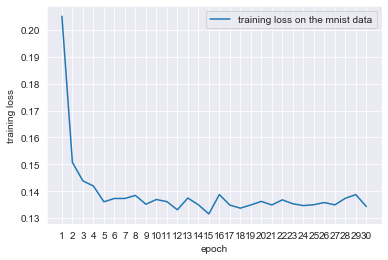

In [8]:
sns.set_style('darkgrid')
x = np.arange(1,31)
my_x_ticks = np.arange(1, 31, 1)
plt.xticks(my_x_ticks)
sns.lineplot(x = x, y = total_loss,label = 'training loss on the mnist data')
#plt.fill_between(x = 'nums', y1 = df['avg'] - df['std'], y2 = df['avg'] + df['std'], alpha = 0.1,color = 'blue', data = df)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.legend()
plt.savefig(r'C:\Users\WXK\Desktop\Deep learning\CNN training loss learning rate 0.01.png')

In [49]:
import pandas as pd
#df = pd.read_csv(r'C:/Users/WXK/Desktop/Deep learning/data/results.csv',index_col = 0)
#df.rename(columns = {'Unnamed: 0': 'nums'}, inplace = True)
#df.drop(['avg','std'],axis = 1, inplace = True)
#temp = df[['iteration 1', 'iteration 2', 'iteration 3']]
#df['avg'] = temp.mean(axis = 1)
#df['std'] = temp.std(axis = 1)
df.drop(labels = range(3750, 11250), axis = 0, inplace = True)
print(df)
#df.to_csv(r'C:/Users/WXK/Desktop/Deep learning/data/results.csv')

      nums  iteration 1  iteration 2  iteration 3       avg       std
0        0     2.409275     2.332321     2.325810  2.355802  0.046423
1        1     2.350019     2.361208     2.313845  2.341690  0.024756
2        2     2.321221     2.348595     2.258438  2.309418  0.046223
3        3     2.343282     2.291207     2.324986  2.319825  0.026419
4        4     2.286081     2.258742     2.287537  2.277453  0.016221
...    ...          ...          ...          ...       ...       ...
3745  3745     0.151050     0.363770     0.187275  0.234032  0.113807
3746  3746     0.058317     0.149557     0.159759  0.122544  0.055856
3747  3747     0.496898     0.214652     0.618447  0.443332  0.207158
3748  3748     0.289061     0.119135     0.303589  0.237262  0.102558
3749  3749     0.511266     0.084815     0.178106  0.258062  0.224188

[3750 rows x 6 columns]
